In [350]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
airbnbdf = pd.read_csv(r'./sample_data/Airbnb_Open_Data.csv')

In [353]:
airbnbdf.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [354]:
airbnbdf.shape

(60908, 26)

In [355]:
airbnbdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60908 entries, 0 to 60907
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              60908 non-null  int64  
 1   NAME                            60705 non-null  object 
 2   host id                         60908 non-null  int64  
 3   host_identity_verified          60691 non-null  object 
 4   host name                       60660 non-null  object 
 5   neighbourhood group             60879 non-null  object 
 6   neighbourhood                   60892 non-null  object 
 7   lat                             60900 non-null  float64
 8   long                            60900 non-null  float64
 9   country                         60585 non-null  object 
 10  country code                    60822 non-null  object 
 11  instant_bookable                60822 non-null  object 
 12  cancellation_policy             

In [356]:
#Checking for duplicate rows
airbnbdf.duplicated().value_counts()

False    60908
dtype: int64

In [357]:
print(airbnbdf['price'].unique())

['$966 ' '$142 ' '$620 ' ... '$1,184 ' '$905 ' '$309 ']


In [ ]:
#Removing '$',',' and ' ' from price
airbnbdf['price']= airbnbdf['price'].str.replace('$','').str.replace(' ','').str.replace(',', '')

In [359]:
#converting 'price' to float
airbnbdf['price']= airbnbdf['price'].astype('float64')

In [360]:
print(airbnbdf['service fee'].unique())

['$193 ' '$28 ' '$124 ' '$74 ' '$41 ' '$115 ' '$14 ' '$212 ' '$204 '
 '$58 ' '$64 ' '$121 ' '$143 ' '$116 ' '$30 ' nan '$56 ' '$95 ' '$27 '
 '$210 ' '$163 ' '$235 ' '$106 ' '$55 ' '$42 ' '$86 ' '$133 ' '$154 '
 '$102 ' '$172 ' '$109 ' '$38 ' '$222 ' '$219 ' '$202 ' '$113 ' '$137 '
 '$171 ' '$12 ' '$87 ' '$183 ' '$92 ' '$73 ' '$146 ' '$180 ' '$67 ' '$51 '
 '$181 ' '$88 ' '$205 ' '$132 ' '$59 ' '$156 ' '$131 ' '$61 ' '$165 '
 '$129 ' '$207 ' '$17 ' '$63 ' '$147 ' '$105 ' '$48 ' '$114 ' '$80 '
 '$23 ' '$11 ' '$149 ' '$213 ' '$211 ' '$182 ' '$117 ' '$39 ' '$25 '
 '$216 ' '$53 ' '$10 ' '$118 ' '$72 ' '$76 ' '$69 ' '$32 ' '$148 ' '$101 '
 '$177 ' '$49 ' '$100 ' '$168 ' '$13 ' '$152 ' '$126 ' '$135 ' '$46 '
 '$231 ' '$91 ' '$199 ' '$158 ' '$221 ' '$189 ' '$90 ' '$186 ' '$66 '
 '$225 ' '$220 ' '$19 ' '$238 ' '$119 ' '$98 ' '$34 ' '$227 ' '$162 '
 '$203 ' '$93 ' '$153 ' '$71 ' '$77 ' '$190 ' '$75 ' '$185 ' '$97 ' '$35 '
 '$37 ' '$82 ' '$120 ' '$21 ' '$145 ' '$65 ' '$144 ' '$108 ' '$194 '
 '$16 

In [ ]:
#Removing '$',',' and ' ' from service fee
airbnbdf['service fee'] = airbnbdf['service fee'].str.replace('$','').str.replace(' ','')

In [362]:
#converting 'service fee' to float
airbnbdf['service fee']= airbnbdf['service fee'].astype('float64')

In [363]:
airbnbdf.drop(['host id','host name','last review'],axis=1, inplace=True)

In [364]:
airbnbdf['neighbourhood group'].value_counts()

Manhattan        26081
Brooklyn         24716
Queens            7904
Bronx             1630
Staten Island      546
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [365]:
#Replacing 'manhatan' and 'brookln' with 'Manhattan' and 'Brooklyn'
airbnbdf['neighbourhood group']=airbnbdf['neighbourhood group'].str.replace('brookln','Brooklyn').replace('manhatan','Manhattan')

In [366]:
airbnbdf['room type'].value_counts()

Entire home/apt    32597
Private room       26932
Shared room         1329
Hotel room            49
Ent                    1
Name: room type, dtype: int64

In [367]:
airbnbdf['room type']=airbnbdf['room type'].str.replace('Ent','Entire home/apt')

In [368]:
airbnbdf['room type'].value_counts()

Entire home/aptire home/apt    32597
Private room                   26932
Shared room                     1329
Hotel room                        49
Entire home/apt                    1
Name: room type, dtype: int64

In [369]:
airbnbdf['room type']=airbnbdf['room type'].str.replace('Entire home/aptire home/apt','Entire home/apt')

In [370]:
airbnbdf['room type'].value_counts()

Entire home/apt    32598
Private room       26932
Shared room         1329
Hotel room            49
Name: room type, dtype: int64

# *Exploratory Data Analysis*

In [371]:
airbnbdf['host_identity_verified'].value_counts()

unconfirmed    30381
verified       30310
Name: host_identity_verified, dtype: int64

In [466]:
#check for null values
airbnbdf['reviews per month'].isnull().value_counts()

False    60908
Name: reviews per month, dtype: int64

In [413]:
#Average monthly reviews
airbnbdf['reviews per month'].mean()

1.5106159636754692

In [414]:
#Replace NaN values with mean monthly reviews
airbnbdf['reviews per month'].fillna(airbnbdf['reviews per month'].mean(),inplace=True)

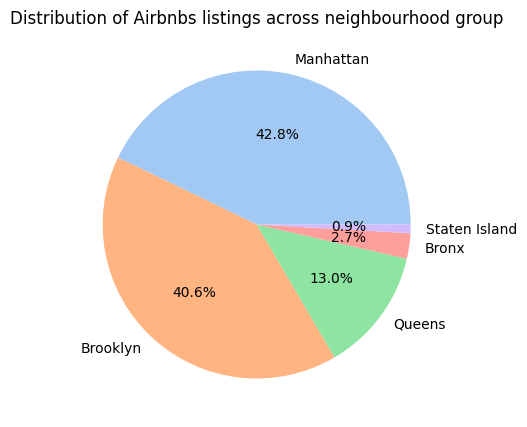

In [467]:
#Distribution of Airbnb's listings across neighbourhood group
x1=airbnbdf['neighbourhood group'].value_counts().index
y1=airbnbdf['neighbourhood group'].value_counts().values
plt.figure(figsize=(5,5))
plt.pie(y1,labels=x1 , colors = sns.color_palette('pastel'), autopct ='%1.1f%%')
plt.title('Distribution of Airbnbs listings across neighbourhood group')
plt.legend
plt.show()

In [416]:
airbnbdf['Construction year'] = airbnbdf['Construction year'].astype('Int64')

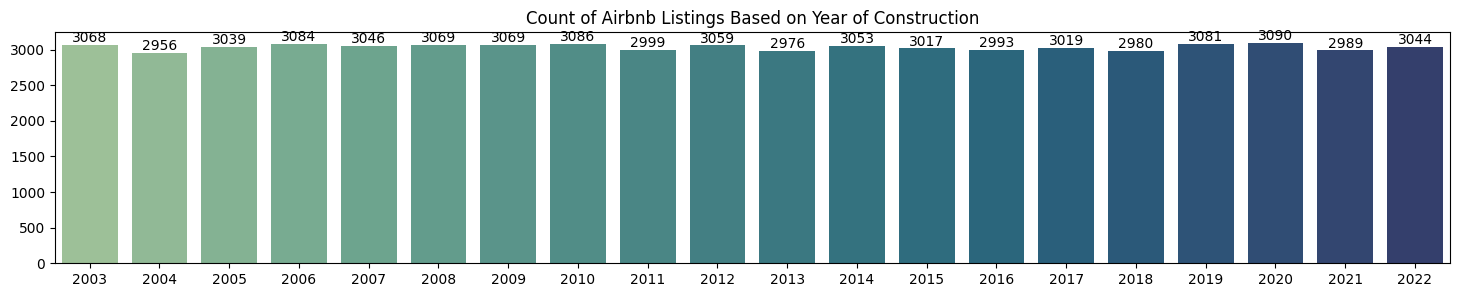

In [448]:
#Count of Airbnb Listings Based on Year of Construction
plt.figure(figsize=(18,3))
x1=airbnbdf['Construction year'].value_counts().index
y1=airbnbdf['Construction year'].value_counts().values
ax=sns.barplot(x=x1,y=y1, palette='crest')
ax.bar_label(ax.containers[0])
plt.title('Count of Airbnb Listings Based on Year of Construction')
plt.legend
plt.show()

In [418]:
airbnbdf['price']= airbnbdf['price'].astype('float64')

In [419]:
# Average Price of Airbnb Listings per Neighborhood
airbnbdf.groupby(['neighbourhood group'])['price'].mean()

neighbourhood group
Bronx            624.724308
Brooklyn         625.330265
Manhattan        622.769266
Queens           626.696159
Staten Island    623.311355
Name: price, dtype: float64

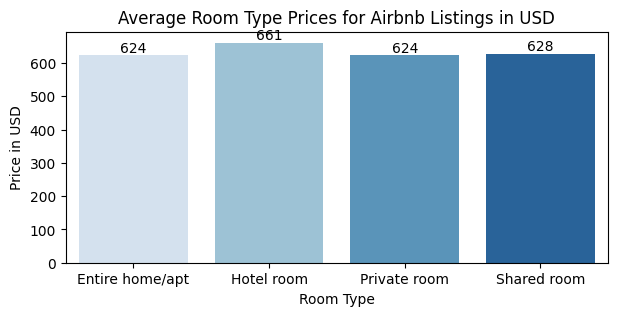

In [472]:
#Average Room Type Prices for Airbnb Listings in USD
avg_price_roomtype= airbnbdf.groupby(['room type'])['price'].mean()
x1=avg_price_roomtype.index
y1=avg_price_roomtype.round(0).values
plt.figure(figsize=(7,3))
bx =sns.barplot(x=x1,y=y1, palette='Blues')
bx.bar_label(bx.containers[0])
plt.title('Average Room Type Prices for Airbnb Listings in USD')
plt.xlabel('Room Type')
plt.ylabel('Price in USD')
plt.legend
plt.show()

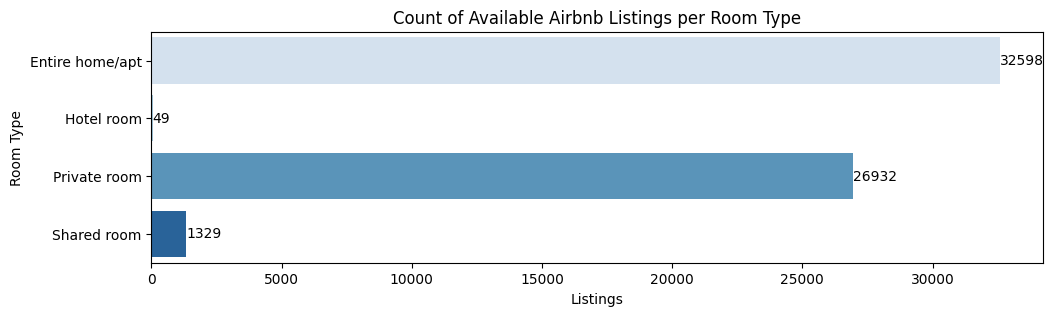

In [470]:
#Count of Available Airbnb Listings per Room Type
available_roomtype = airbnbdf.groupby(['room type'])['id'].count()
x1=available_roomtype.index
y1 = available_roomtype.values
plt.figure(figsize=(11.5,3))
bx =sns.barplot(x=y1,y=x1, palette='Blues')
bx.bar_label(bx.containers[0])
plt.title('Count of Available Airbnb Listings per Room Type')
plt.xlabel('Listings')
plt.ylabel('Room Type')
plt.legend
plt.show()

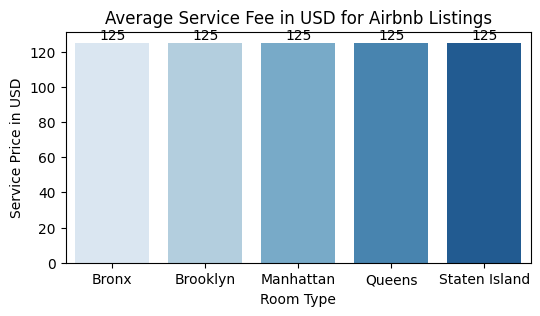

In [450]:
#Average Service Fee per Neighborhood Group in USD for Listings
avg_servicefee = airbnbdf.groupby(['neighbourhood group'])['service fee'].mean()
x1=avg_servicefee.index
y1=avg_servicefee.round(0).values
plt.figure(figsize=(6,3))
bx =sns.barplot(x=x1,y=y1, palette='Blues')
bx.bar_label(bx.containers[0])
plt.title('Average Service Fee in USD for Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Service Price in USD')
plt.legend
plt.show()

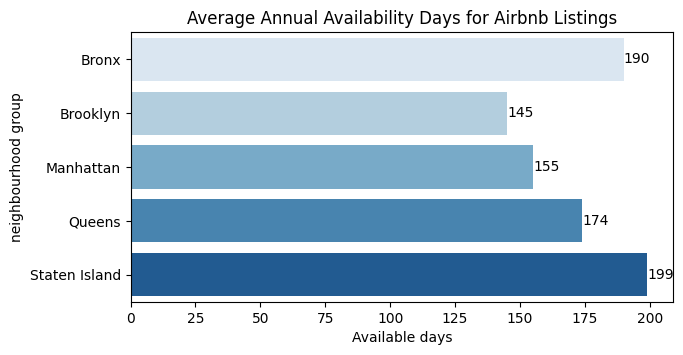

In [452]:
#Average Number of Available Days per Year per Neighborhood Group
avg_availability = airbnbdf.groupby(['neighbourhood group'])['availability 365'].mean()
x1 = avg_availability.index
y1= avg_availability.round(0).values
plt.figure(figsize=(7,3.5))
bx =sns.barplot(x=y1,y=x1, palette='Blues')
bx.bar_label(bx.containers[0])
plt.title('Average Annual Availability Days for Airbnb Listings')
plt.xlabel('Available days')
plt.ylabel('neighbourhood group')
plt.legend
plt.show()

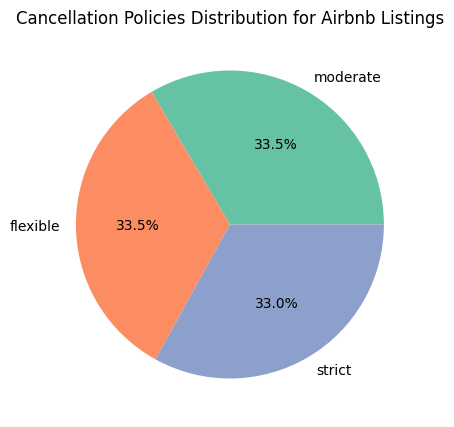

In [453]:
#Cancellation Policies Distribution for Airbnb Listings
cancellation_count = airbnbdf['cancellation_policy'].value_counts()
x=cancellation_count.index
y=cancellation_count.values
plt.figure(figsize=(5,5))
plt.pie(y,labels=x , colors = sns.color_palette('Set2'), autopct ='%1.1f%%')
plt.title('Cancellation Policies Distribution for Airbnb Listings')
plt.legend
plt.show()

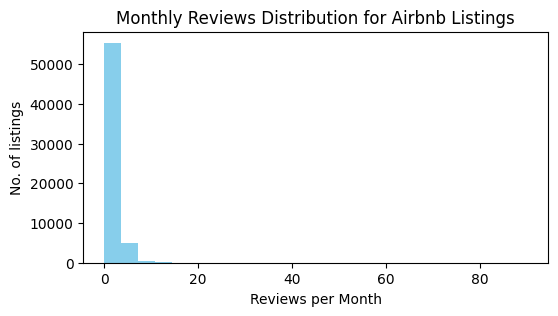

In [465]:
#Monthly Reviews Distribution for Airbnb Listings"
plt.figure(figsize=(6,3))
plt.hist(airbnbdf['reviews per month'], bins=25, color='skyblue')
plt.xlabel('Reviews per Month')
plt.ylabel('No. of listings')
plt.title('Monthly Reviews Distribution for Airbnb Listings')
plt.legend
plt.show()